# * Kurapati Venkatesh

# * 09012021

# * Topic: Multinominal Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## Perform Multinomial regression on the dataset in which loan_status is the output (Y) variable and it has three levels in it. 

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model to perform multinomial regression on the given data and classify the person based on the loan status

### Business Problem:

The main concerns of investors is how to minimize risks, and maximize their investments. The risk at Lending Club is higher for investors than in the banks since deposits are not protected. This can result in the loss for the investors. This case study has two main objectives:

1. To build a loan risk model for investors using supervised machine learning method (classification) that will help investors to predict if a borrower will repay the loan based on historical data provided by Lending Club.

2. To help investors when deciding which investment strategy to choose.

## -------------------------------------------------------------------------------------------

## import libraries:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## import dataset:

In [2]:
df = pd.read_csv(r"G:\360digit\assignments meterial\multinomial regression\loan.csv")
df.head(3)

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning:

In [3]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 

,Count,Percent
emp_title,2459,6.191303
emp_length,1075,2.706650
desc,12940,32.580507
title,11,0.027696
mths_since_last_delinq,25682,64.662487
...,...,...
tax_liens,39,0.098195
tot_hi_cred_lim,39717,100.000000
total_bal_ex_mort,39717,100.000000
total_bc_limit,39717,100.000000


As we can see, there are a lot of columns which have huge chunk of data missing. These columns are not necessary for our analysis. The following part will drop any columns where 80% or more data is missing. This will help us clean the Dataset a little bit.

In [4]:
df1 = df.dropna(axis=1, thresh=int(0.80*len(df)))

In [5]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Now that we explored the whole dataframe easily, we will now select the columns that are necessary for our analysis.

In [6]:
df_LC = df1.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])
df_LC.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs              int64
loan_status             object
dtype: object

#### Finding the correlation between variables:

We will now look at the correlation structure between our variables that we selected above. This will tell us about any dependencies between different variables and help us reduce the dimensionality a little bit more

<AxesSubplot:>

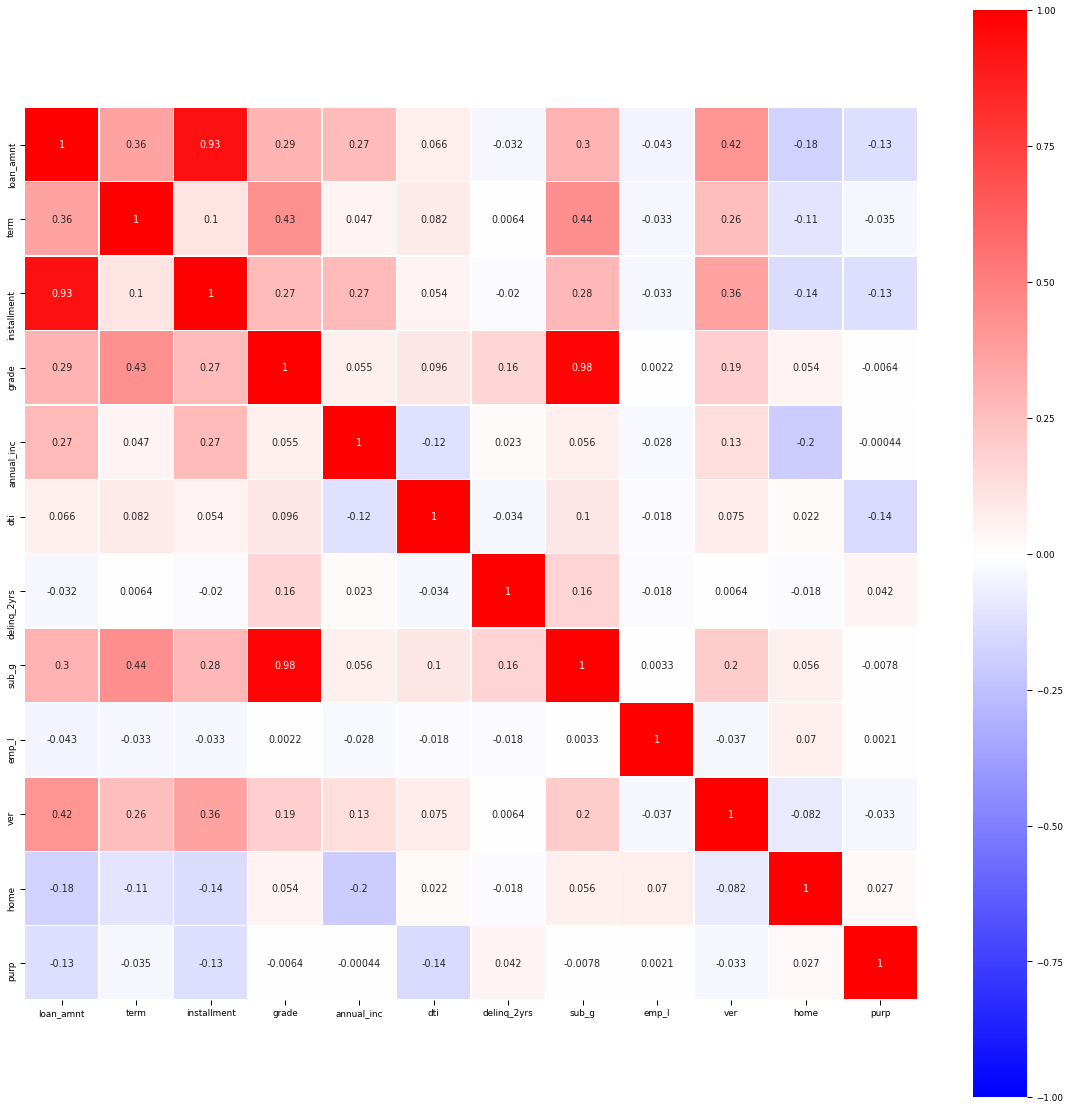

In [9]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(grade=df_LC.grade.astype('category').cat.codes,
                         sub_g=df_LC.sub_grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                        emp_l=df_LC.emp_length.astype('category').cat.codes,
                         ver =df_LC.verification_status.astype('category').cat.codes,
                        home=df_LC.home_ownership.astype('category').cat.codes,
                        purp=df_LC.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

It can be seen from the plot above that loan amount and installment have a very high correlation amongst each other (0.94). This is intuitive since a person who takes a large sum of loan would require extra time to repay it back. Also, interest rate, sub grade and grade have a very high correlation between them. This is obvious since interest rate is decided by grades once the grades are decided, a subgrade is assigned to that loan (leading to high correlation).


Let's drop the three categories alongwith term and verification status(since it doesn't provide any valuable info) for further analysis.

In [10]:
df_LC.drop(['installment','grade','sub_grade','verification_status','term']
           , axis=1, inplace = True)

In [11]:
#printing the count and null values in the dataframe
dflc_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})
dflc_null[dflc_null['Count'] > 0]

,Count,Percent
emp_length,1075,2.70665


In [12]:
# dropping the null rows since we have sufficient amount of data and there is no need to fill the null values.
df_LC.dropna(axis=0)

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,5000,10.65%,10+ years,RENT,24000.0,credit_card,27.65,0,Fully Paid
1,2500,15.27%,< 1 year,RENT,30000.0,car,1.00,0,Charged Off
2,2400,15.96%,10+ years,RENT,12252.0,small_business,8.72,0,Fully Paid
3,10000,13.49%,10+ years,RENT,49200.0,other,20.00,0,Fully Paid
4,3000,12.69%,1 year,RENT,80000.0,other,17.94,0,Current
...,...,...,...,...,...,...,...,...,...
39712,2500,8.07%,4 years,MORTGAGE,110000.0,home_improvement,11.33,0,Fully Paid
39713,8500,10.28%,3 years,RENT,18000.0,credit_card,6.40,1,Fully Paid
39714,5000,8.07%,< 1 year,MORTGAGE,100000.0,debt_consolidation,2.30,0,Fully Paid
39715,5000,7.43%,< 1 year,MORTGAGE,200000.0,other,3.72,0,Fully Paid


In [13]:
## printing unique statuses in the loan status column (dependent variable)
df_LC['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

##### Distribution of the loan status values:

Let us now see how the values in the status column are distributed. We will plot an histogram of values against count of times the status appears on the dataframe

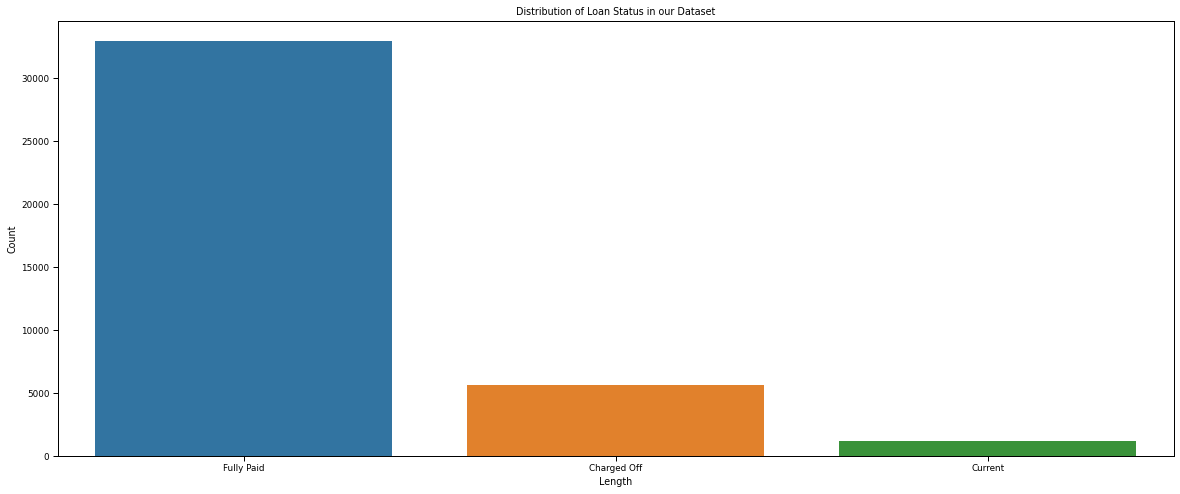

In [14]:
m =df_LC['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()

As we can see, we have loans which are current, chargedoff and fully paid loans.

In [15]:
df_LC.dtypes

loan_amnt           int64
int_rate           object
emp_length         object
home_ownership     object
annual_inc        float64
purpose            object
dti               float64
delinq_2yrs         int64
loan_status        object
dtype: object

### Boxplot of independent variable distribution for each category of loan_status:

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

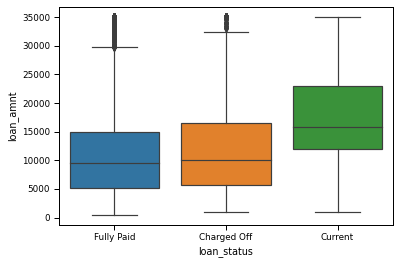

In [19]:
sns.boxplot(x = "loan_status", y = "loan_amnt", data = ls)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

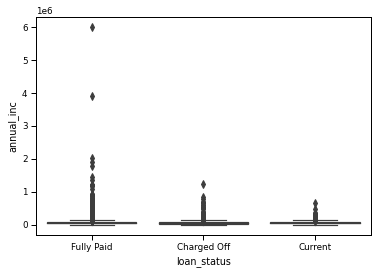

In [24]:
sns.boxplot(x = "loan_status", y = "annual_inc", data = ls)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

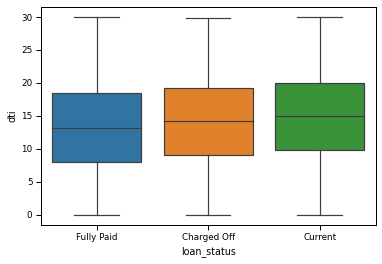

In [25]:
sns.boxplot(x = "loan_status", y = "dti", data = ls)

<AxesSubplot:xlabel='loan_status', ylabel='delinq_2yrs'>

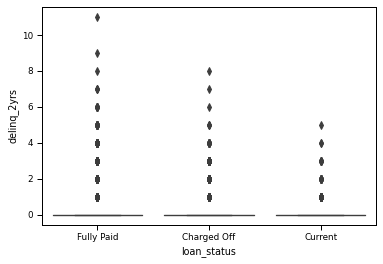

In [27]:
sns.boxplot(x = "loan_status", y = "delinq_2yrs", data = ls)

##### Scatter plot between each possible pair of independent variable and also histogram for each independent variable:

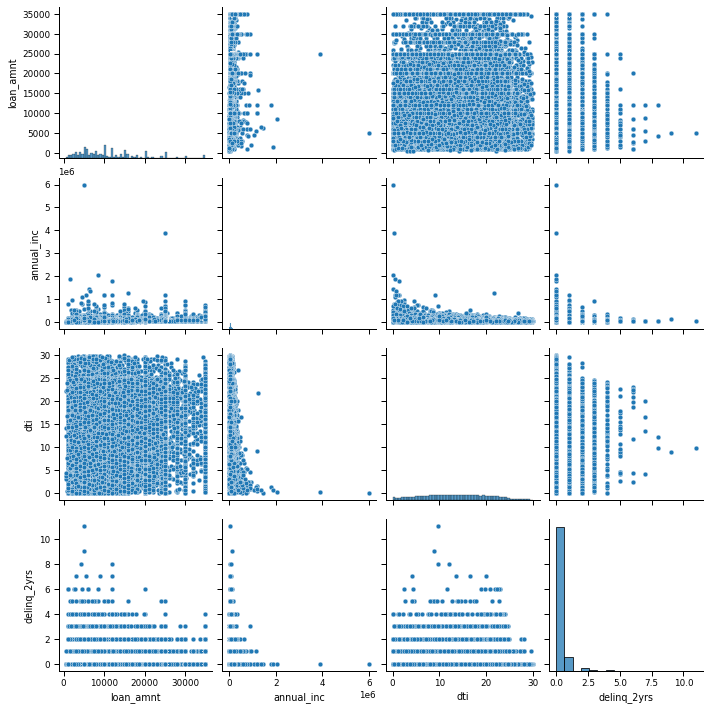

In [32]:
sns.pairplot(ls) # Normal

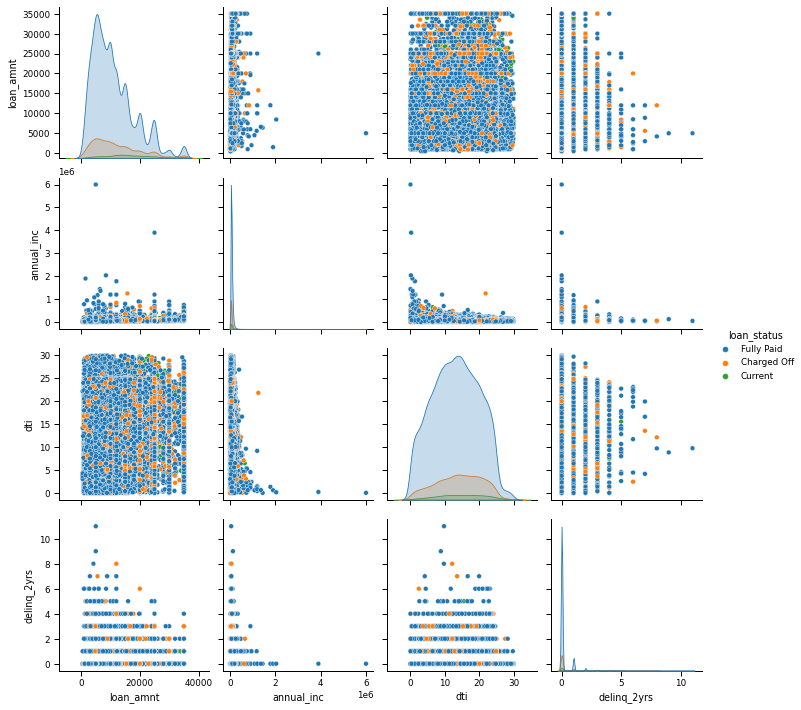

In [33]:
sns.pairplot(ls, hue = "loan_status")

#### Transformation:

Before training the data, we would first transform the data to account for any skewness in the variable distribution. Various transformation techniques ranging from log transform to power transformation are available. For our analysis, we'll be using Box-cox transformation. It is used to modify the distributional shape of a set of data to be more normally distributed so that tests and confidence limits that require normality can be appropriately used.

In [46]:
from scipy.stats import boxcox
numerical = df_LC.columns[df_LC.dtypes == 'float64']
for i in numerical:
    if df_LC[i].min() > 0:
        transformed, lamb = boxcox(df_LC.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_LC.loc[df[i].notnull(), i] = transformed

##### One Hot Encoding:

Since we have some categorical variables for the analysis and the machne learning algorithms doesn't take categorical and string variables directly, we have to creat dummy variables for them. We can either encode them using label encoder available for python, but it would be wrong in our analysis since a lot of these variables have multiple categories. Just using weights can cause discrepencies in the algorithm. Instead, we will one hot encode these so that we have a 1 wherever that category turns up and 0 otherwise. This will also create seperate columns for each level of category. Also, we'll be dropping one of the categories so that we have N-1 columns instead of N.

In [48]:
dfnols=df_LC.drop('loan_status',axis=1)

In [49]:
dfdummies = pd.get_dummies(dfnols, drop_first=True)

In [51]:
dfls = df_LC['loan_status']
dfls.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

In [53]:
dfloan = pd.concat([dfls, dfdummies], axis=1)
dfloan.head()

,loan_status,loan_amnt,annual_inc,dti,delinq_2yrs,int_rate_10.01%,int_rate_10.08%,int_rate_10.14%,int_rate_10.20%,int_rate_10.25%,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,Fully Paid,5000,7.839786,27.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Charged Off,2500,7.970770,1.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,2400,7.435754,8.72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Fully Paid,10000,8.255765,20.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Current,3000,8.528743,17.94,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Model:

In [54]:
train, test = train_test_split(dfloan, test_size = 0.2)

In [56]:
train.dtypes

loan_status                  object
loan_amnt                     int64
annual_inc                  float64
dti                         float64
delinq_2yrs                   int64
                             ...   
purpose_other                 uint8
purpose_renewable_energy      uint8
purpose_small_business        uint8
purpose_vacation              uint8
purpose_wedding               uint8
Length: 402, dtype: object

In [57]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, 1:], train.iloc[:, 0])

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [63]:
model

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [58]:
test_predict = model.predict(test.iloc[:, 1:]) # Test predictions

In [59]:
# Test accuracy 
accuracy_score(test.iloc[:,0], test_predict)

0.8319486404833837

In [60]:
train_predict = model.predict(train.iloc[:, 1:]) # Train predictions 

In [61]:
# Train accuracy 
accuracy_score(train.iloc[:,0], train_predict) 

0.8295408050860794

###### we got a good model with an accuracy of 83%.